<a href="https://colab.research.google.com/github/conrrado/MLLinearRegression/blob/main/AluraLinearRegressionProject1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
# Reading data
data = pd.read_csv("/content/Preços_de_casas.csv")

In [3]:
# What factors were collected?
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1438 entries, 0 to 1437
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Id                              1438 non-null   int64  
 1   area_primeiro_andar             1438 non-null   float64
 2   existe_segundo_andar            1438 non-null   int64  
 3   area_segundo_andar              1438 non-null   float64
 4   quantidade_banheiros            1438 non-null   int64  
 5   capacidade_carros_garagem       1438 non-null   int64  
 6   qualidade_da_cozinha_Excelente  1438 non-null   int64  
 7   preco_de_venda                  1438 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 90.0 KB


In [5]:
# Removing id column that is not relevant for learning this data
data = data.drop(columns = "Id")

**Correlação**

Quais fatores estão relacionados ao preço da casa? Como é essa relação?

Com o coeficiente de Correlação de Pearson nos permite medir a relação linear entre variáveis, oferecendo uma escala que varia de -1 a 1, que interpretamos conforme sua intensidade e direção:

-1: indica uma correlação negativa perfeita: à medida que uma variável aumenta, a outra diminui.

0: não há relação linear entre as variáveis.

1: correlação positiva perfeita: à medida que uma variável aumenta, a outra também aumenta.

In [7]:
corr = data.corr()

In [9]:
# Correlation of characteristics with selling price
corr['preco_de_venda']

,preco_de_venda
area_primeiro_andar,0.616557
existe_segundo_andar,0.138541
area_segundo_andar,0.305311
quantidade_banheiros,0.563132
capacidade_carros_garagem,0.640214
qualidade_da_cozinha_Excelente,0.496223
preco_de_venda,1.000000


**Exercise**

Checking correlation visually

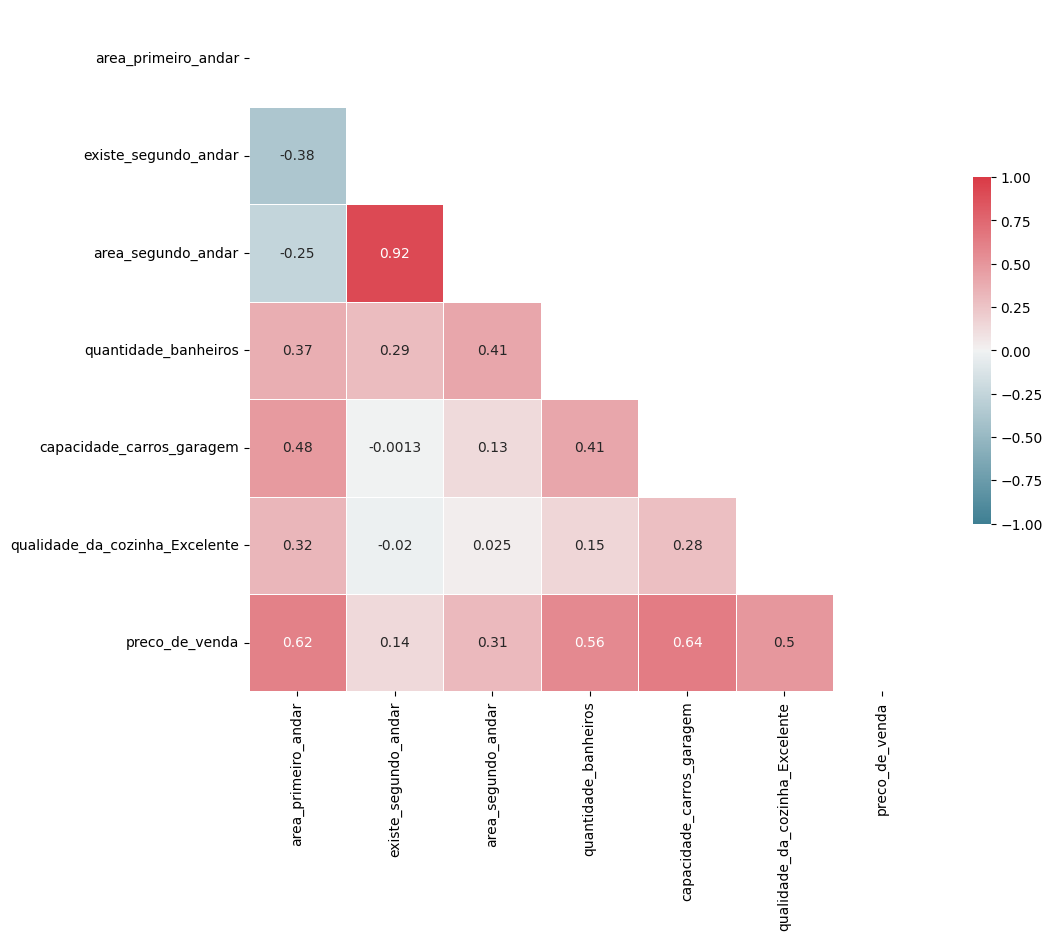

In [10]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Generate a mask for the top triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Configure matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate the heatmap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0, square=True,
            linewidths=.5, annot=True, cbar_kws={"shrink": .5})

# Show
plt.show()

**Relacionando Variáveis**

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

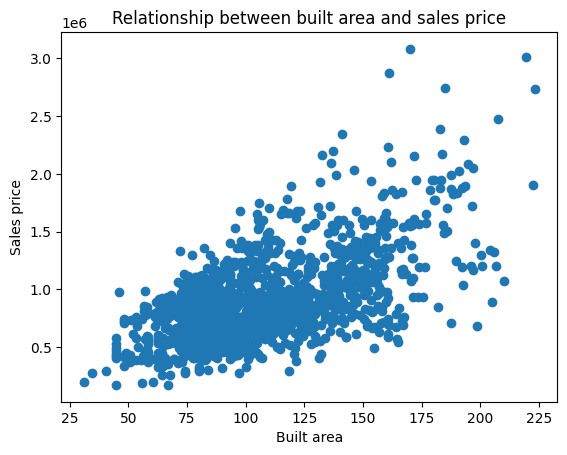

In [14]:
# What is the relationship between built area and sales price?
plt.scatter(data['area_primeiro_andar'], data['preco_de_venda'])
plt.title('Relationship between built area and sales price')
plt.xlabel('Built area')
plt.ylabel('Sales price')
plt.show()

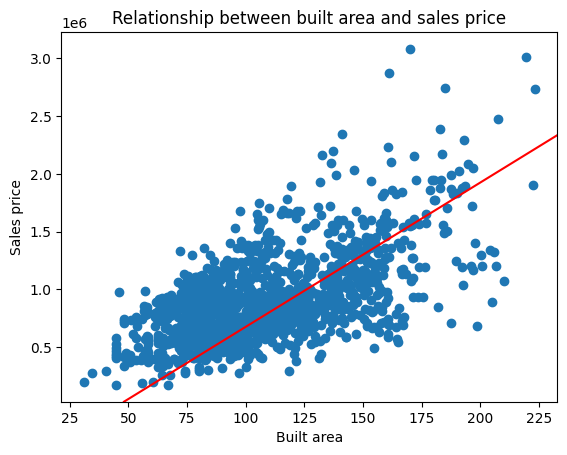

In [16]:
# Apparently, the larger the built area, the higher the selling price.
# Trying to draw a line that represents this behavior
plt.scatter(data['area_primeiro_andar'], data['preco_de_venda'])
plt.axline(xy1 = (66, 250000), xy2 = (190, 1800000), color = "red")
plt.title('Relationship between built area and sales price')
plt.xlabel('Built area')
plt.ylabel('Sales price')
plt.show()

In [17]:
# Using the library to draw a line that represents this behavior
px.scatter(data, x = "area_primeiro_andar", y = "preco_de_venda",
           trendline_color_override = "red", trendline = "ols")